In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
import io
def get_curve(txt):
    out = io.BytesIO(txt)
    out.seek(0)
    return np.load(out)

In [3]:
# cesta k .db suboru - zmenit na spravnu cestu
FILEPATH = '/home/jovyan/data/lightning/data-upjs/overcontact_bellow_i_crit.db'
# vytvorenie connection na subor .db v sqllite formate
conn = sqlite3.connect(FILEPATH)

In [4]:
# nacitanie ake su tabulky v databaze (to len aby bolo jasne ako sa to zistit - realne su dve - parameters a curves)
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('parameters',), ('curves',), ('auxiliary',)]


In [5]:
df_parameters = pd.read_sql_query("SELECT id, overcontact FROM parameters", conn)



df_parameters.head()

,id,overcontact
0,5523148,1
1,5523149,1
2,5523151,1
3,5523152,1
4,5523156,1


In [6]:
df_parameters

,id,overcontact
0,5523148,1
1,5523149,1
2,5523151,1
3,5523152,1
4,5523156,1
...,...,...
55910,74138888,1
55911,74138890,1
55912,74138900,1
55913,74138901,1


In [7]:
# df_parameters = df_parameters.sample(10000)

In [8]:
df_parameters.shape

(55915, 2)

In [9]:
for col in df_parameters.columns:
    print(col)

id
overcontact


In [10]:
for i in df_parameters['overcontact']:
    if i == 1:
        print("som jeden")

som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden
som jeden


In [11]:
df_curves = pd.read_sql_query("SELECT * FROM curves ORDER BY RANDOM() LIMIT 10000", conn)
conn.close()

In [12]:

df_curves.head(2)

,id,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,SLOAN_u,SLOAN_g,SLOAN_r,SLOAN_i,SLOAN_z,Kepler,GaiaDR2,TESS
0,5525863,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \..."
1,70736440,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \..."


In [13]:
my_curve_values = np.frombuffer(df_curves["Bessell_U"][3000])
my_curve_values1 = get_curve(df_curves["Bessell_U"][3000])
print(my_curve_values)

[1.87585069e-309 1.17119999e+171 5.22741680e-037 8.44740097e+252
 2.65141232e+180 9.92152605e+247 2.16209968e+233 1.39938206e-076
 6.01399921e-154 6.01347002e-154 6.01347002e-154 6.01347002e-154
 6.01347002e-154 6.01347002e-154 6.01347002e-154 6.55490914e-260
 8.76046154e-001 8.76083115e-001 8.76186040e-001 8.76344572e-001
 8.76554774e-001 8.76837657e-001 8.77183891e-001 8.77589621e-001
 8.78047503e-001 8.78565440e-001 8.79151613e-001 8.79799946e-001
 8.80505711e-001 8.81253173e-001 8.82065344e-001 8.82941710e-001
 8.83886450e-001 8.84881791e-001 8.85918908e-001 8.86998522e-001
 8.88130724e-001 8.89318429e-001 8.90548656e-001 8.91830020e-001
 8.93156298e-001 8.94528904e-001 8.95955761e-001 8.97433993e-001
 8.98949310e-001 9.00495513e-001 9.02074024e-001 9.03680796e-001
 9.05335942e-001 9.07013365e-001 9.08712109e-001 9.10443653e-001
 9.12207307e-001 9.13997929e-001 9.15815501e-001 9.17642132e-001
 9.19497192e-001 9.21364496e-001 9.23244661e-001 9.25131189e-001
 9.27033966e-001 9.289449

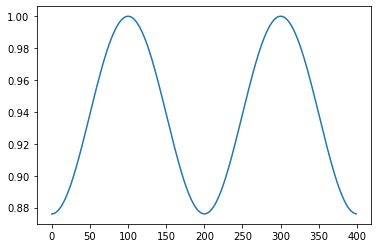

In [14]:
plt.plot(my_curve_values[16:])
plt.show()

In [15]:
row = df_curves.iloc[7800]
row_curves = row[1:]
my_curves = row_curves.apply(get_curve) 
print(my_curves)

Bessell_U    [0.9009894776450762, 0.9010110620154265, 0.901...
Bessell_B    [0.9042439530598503, 0.904264210198791, 0.9043...
Bessell_V    [0.9118611379359877, 0.9118778900789336, 0.911...
Bessell_R    [0.9158398232137609, 0.9158547017079497, 0.915...
Bessell_I    [0.9198304857757701, 0.919843478767436, 0.9199...
SLOAN_u      [0.9009666466075141, 0.9009881973806722, 0.901...
SLOAN_g      [0.9073378164739513, 0.9073566593956549, 0.907...
SLOAN_r      [0.9150485624919433, 0.9150638203297007, 0.915...
SLOAN_i      [0.9188736915778563, 0.9188871258935752, 0.918...
SLOAN_z      [0.9213429777677722, 0.9213552499325164, 0.921...
Kepler       [0.9137746970836842, 0.9137905418094932, 0.913...
GaiaDR2      [0.9139961443157651, 0.9140118659483856, 0.914...
TESS         [0.91614311797918, 0.9161578597332946, 0.91621...
Name: 7800, dtype: object


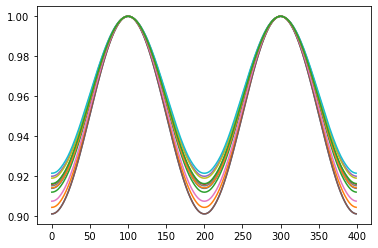

In [16]:
for c in my_curves:
    plt.plot(c)
    
plt.show()

In [17]:
df1 = df_curves[["id","Bessell_U", "Bessell_B", "Bessell_V", "Bessell_R", "Bessell_I"]]
df2 = df_parameters[["id", "overcontact"]]
df_merged = pd.merge(df1,df2,on="id")
df_merged["Bessell_U"] = df_merged["Bessell_U"].apply(get_curve)
df_merged["Bessell_V"] = df_merged["Bessell_V"].apply(get_curve)
df_merged["Bessell_R"] = df_merged["Bessell_R"].apply(get_curve)
df_merged["Bessell_I"] = df_merged["Bessell_I"].apply(get_curve)
df_merged["Bessell_B"] = df_merged["Bessell_B"].apply(get_curve)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10000 non-null  int64 
 1   Bessell_U    10000 non-null  object
 2   Bessell_B    10000 non-null  object
 3   Bessell_V    10000 non-null  object
 4   Bessell_R    10000 non-null  object
 5   Bessell_I    10000 non-null  object
 6   overcontact  10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 625.0+ KB


In [18]:
df_merged.to_pickle("overcontact_bellow_i_crit_10000.pkl")

In [ ]:
df_merged_nacitany = pd.read_pickle("vyber.pkl")